In [ ]:
#DIR3122: Computational Fluid Dynamics - Bridget McGibbon
#Step 5: Linear Convection in 2D

In [2]:
import numpy as np
from matplotlib import pyplot, cm
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 

In [3]:
#define variables
c = 1
sigma = 0.2

nx = 100
dx = 2/(nx-1)

ny = nx
dy = 2/(ny-1)

nt = 100
dt = sigma*dx

#make a 2x2 grid
xdim = np.linspace(0,2,nx)
ydim = np.linspace(0,2,ny)

In [5]:
#initialize u
u = np.ones((nx, ny)) #this is an array of arrays
print(u)
un = u.copy()

#set up initial conditions: u=2 when 0.5<=x<=1 AND 0.5<=y<=1 
u[ int(0.5/dx):(int(1/dx)+1) , int(0.5/dy):(int(1/dy)+1) ] = 2

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


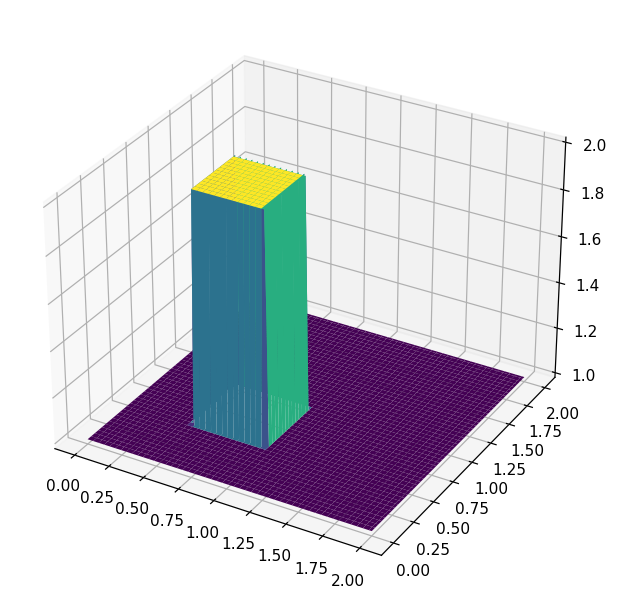

In [4]:
fig = pyplot.figure(figsize = (11,7), dpi=110) #create a figure, figsize and dpi denote the size and resolution, respectively
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(xdim, ydim)
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

In [5]:
# %%timeit
# #iterating over 2 dimensions using for loops
# for n in range(1, nt+1): #loop over nt timesteps
#     un = u.copy()
#     row, col = u.shape #assigns the number of elements in each element of u to row and col (don't know why this is necessary, just say nx and ny)
#     for i in range (1, row):
#         for j in range(1, col):
#             u[i,j] = un[i,j] - (c*(dt/dx)*(un[i,j]-un[i-1,j])) - (c*(dt/dx)*(un[i,j]-un[i,j-1]))
            
#             #boundary conditions
#             u[0, :] = 1 #starting x at 1
#             u[-1, :] = 1 #ending x at 1
#             u[:, 0] = 1 #starting y at 1
#             u[:, -1] = 1 #ending y at 1

In [6]:
# %%timeit
#using array operations
for n in range(nt+1):
    un = u.copy()
    u[1:, 1:] = un[1:, 1:] - (c*(dt/dx)*(un[1:,1:] - un[:-1, 1:])) - (c*(dt/dx)*(un[1:,1:] - un[1:, :-1]))
    
    #boundary conditions
    u[0, :] = 1 #starting x at 1
    u[-1, :] = 1 #ending x at 1
    u[:, 0] = 1 #starting y at 1
    u[:, -1] = 1 #ending y at 1

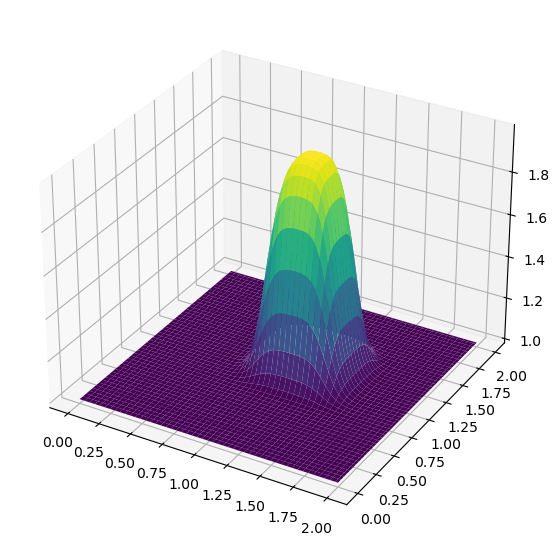

In [7]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

In [8]:
#using %%timeit
#nested loops took 3 s ± 197 ms per loop (mean ± std. dev. of 7 runs, 1 loop each
#array operations took 7.19 ms ± 421 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)